<a href="https://colab.research.google.com/github/dagyaom/Python_Practice/blob/main/data_Wrangling_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Wrangling (데이터 랭글링)

분석하거나 모델만들기 전 데이터를 사용하기 쉽게 변형 or 맵핑하는 과정. 


라이브러리, 패키지, 모듈
https://znos.tistory.com/41

https://dodonam.tistory.com/107

# 1.파일 다운로드&zip파일 풀기.

In [ ]:
# 파일다운로드 함수

!pip install tqdm
import requests
from tqdm.notebook import tqdm

def download_file(url):
    filename = url.split('/')[-1]    
    chunkSize = 1024
    r = requests.get(url, stream=True)
    with open(filename, 'wb') as f:
        pbar = tqdm(unit="KB", total=int(r.headers['Content-Length']))
        for chunk in r.iter_content(chunk_size=chunkSize):
            if chunk:
                pbar.update(len(chunk))
                f.write(chunk)

In [ ]:
# 주소로부터 다운로드하기.
download_file('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/instacart/instacart.zip')

  0%|          | 0/205791002 [00:00<?, ?KB/s]

In [ ]:
# 압축해제

import zipfile

with zipfile.ZipFile('instacart.zip','r') as zip_ref:   #'r' : 읽어오기.
    zip_ref.extractall('C:\jupyter_job')  #여기에는 압출을 풀 경로.


# 압축 : https://yganalyst.github.io/data_handling/memo_2/

In [ ]:
# 압축해제 후 만들어진 폴더로 이동.
%cd instacart

C:\jupyter_job\instacart


In [ ]:
# csv 파일 프린트

from glob import glob  #glob모듈의 glob함수 불러오기.
for filename in glob('*.csv'):
    print(filename)
    
# glob은 파일의 리스트를 뽑는다.(파일의 경로명을 이용해서 입맛대로 가능!) : https://wikidocs.net/83
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=siniphia&logNo=221397012627

aisles.csv
departments.csv
orders.csv
order_products__prior.csv
order_products__train.csv
products.csv
sample_submission.csv


In [ ]:
# 각 파일의 shape, head를 출력해보자

from IPython.display import display  #내가 아이파이썬 라이브러리 불러올 때 p를 대문자로 안써서 계속 에러남 ;;;
import pandas as pd

def preview():
    for filename in glob('*.csv'):
        df = pd. read_csv(filename)
        print(filename, df.shape)
        display(df.head())
        print('\n')
        
#https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# https://stackoverflow.com/questions/42310941/modulenotfounderror-no-module-named-ipython

In [ ]:
preview()

aisles.csv (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation




departments.csv (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol




orders.csv (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0




order_products__prior.csv (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0




order_products__train.csv (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1




products.csv (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13




sample_submission.csv (75000, 2)


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


고객은 다음 주문에서 어떤 제품을 주문하게 될까?

In [ ]:
import numpy as np
import pandas as pd
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
submission = pd.read_csv('sample_submission.csv')


In [ ]:
# 일단 데이터 형태를 살펴본다.
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
prior.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [ ]:
train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [ ]:
submission.head(3)

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259


In [ ]:
orders[orders['order_id'] == 17]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611292,17,36855,test,5,6,15,1.0


In [ ]:
orders[orders['user_id']==36855]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611288,898818,36855,prior,1,1,13,NaN
611289,234692,36855,prior,2,0,9,30.0
611290,3248434,36855,prior,3,6,14,6.0
611291,1058761,36855,prior,4,5,13,6.0
611292,17,36855,test,5,6,15,1.0


In [ ]:
prior[prior.order_id==3248434]

,order_id,product_id,add_to_cart_order,reordered
30795642,3248434,15613,1,0
30795643,3248434,44056,2,0
30795644,3248434,38777,3,1
30795645,3248434,13107,4,1
30795646,3248434,18288,5,0
30795647,3248434,16965,6,0
30795648,3248434,21463,7,0
30795649,3248434,40002,8,0
30795650,3248434,6291,9,0


In [ ]:
# 테스트세트와 train세트가 완전히 분리되었는가?
# set : 순서가 없다. 

set(orders[orders['eval_set']=='test']['user_id'])\
.isdisjoint(set(orders[orders['eval_set']=='train']['user_id']))

True

In [ ]:
# 테스트, 훈련 세트에 각 고객 중복샘플이 있는가??

len(orders[orders['eval_set'].isin(['train','test'])])

206209

In [ ]:
len(orders[orders['eval_set'].isin(['train','test'])]['user_id'].unique())

# 없군. 한 고객은 한 샘플만 있다. 

206209

원래 문제는 고객이 어떤 제품을 구매할 것인가를 예측하는 것이지만,
좀더 간단하게! 구매자가 특정 상품을 구매할것인가, 말것인가를 예측해보자
이걸 예측하기 위해서, 고객이 무슨 상품을 가장 많이 사는가를 일단 알아보자.

## 1) 타겟만들기 : 고객들이 가장 빈번하게 주문하는 제품은?

In [ ]:
# 최빈값 찾기.

prior['product_id'].mode()

0    24852
dtype: int64

In [ ]:
# 유일값별 갯수세기
prior['product_id'].value_counts()

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
37660         1
42235         1
31333         1
3117          1
10806         1
Name: product_id, Length: 49677, dtype: int64

In [ ]:
train['product_id'].mode()

# prior, train에서 가장 많이 구매하는 제품은 모두 24852구나..!

0    24852
dtype: int64

In [ ]:
# 상위 5개 구매제품 찾기
top5 = list(prior['product_id'].value_counts()[:5].index)
top5

[24852, 13176, 21137, 21903, 47209]

In [ ]:
# product_id에는 중복값 없으므로 인덱스로 만들기

products.set_index('product_id').loc[top5]

## 1,2위 전부 바나나로군..! product_id = 24852

,product_name,aisle_id,department_id
product_id,,,
24852,Banana,24,4
13176,Bag of Organic Bananas,24,4
21137,Organic Strawberries,24,4
21903,Organic Baby Spinach,123,4
47209,Organic Hass Avocado,24,4


In [ ]:
# products의 id유일값 갯수와 products갯수 일치. 즉, 아이디 한개에 제품 한개
len(products.product_id.unique()) == len(products)

True

In [ ]:
prior = prior.merge(products, on = 'product_id')
prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [ ]:
prior['product_name'].value_counts()

Banana                                         472565
Bag of Organic Bananas                         379450
Organic Strawberries                           264683
Organic Baby Spinach                           241921
Organic Hass Avocado                           213584
                                                ...  
Anarchy For Her Daily Fragrance                     1
Escapes Variety Pack                                1
Bottle & Nipple Brush Set                           1
Buddy Bear Probiotic Orange Flavor Chewable         1
Raspberry Blast Fruit and Chia Seed Bar             1
Name: product_name, Length: 49677, dtype: int64

In [ ]:
train = train.merge(products, how='inner', on='product_id')
train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


###  --> 바나나(product_id = 24852)

이 고객이 바나를 재구매할 것인가에 대해 알아보자. 

## 2) 고객들이 이 제품을 <최근>에 얼마나 구매하였는가?
- 고객주문 최근데이터 : train, test (prior : 이전주문 기록)
- train : 각 행이 한 제품. 하나의 주문_id에 고객이 구매한 여러 제품이 있음.

그럼 어떡해야 할까?

- 한 주문에 속하는 여러 제품을 order_id별로 그룹화하기.
- 한 주문에 바나나가 포함되어 있는지 bool로 나타내는 feature만들기.

In [ ]:
id_Banana = 24852

In [ ]:
# 바나나 행 만들기

train['banana'] = train['product_id'] == id_Banana
train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,banana
0,1,49302,1,1,Bulgarian Yogurt,120,16,False
1,816049,49302,7,1,Bulgarian Yogurt,120,16,False
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,False
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,False
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,False


In [ ]:
# 모든 구입 제품 중 바나나 비율

train['banana'].value_counts(normalize= True)

False    0.986476
True     0.013524
Name: banana, dtype: float64

### apply
- apply : 데이터프레임 중 '열'을 기준으로 '함수'를 적용한다. --> 기본함수, 사용자정의함수, 람다
- 예를들면 길이를 구하는 함수 len, 리스트를 구하는 함수 list 등이 들어갈 수 있다. 
- 엄청난 설명 : https://chan-lab.tistory.com/20

#### groupby연습

In [ ]:
### 그룹바이 연습
import pandas as pd
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/assignments/purchase_data.csv", sep=",",index_col=0)

In [ ]:
df.head(3)

,SN,Age,Gender,Item ID,Item Name,Price
Purchase ID,,,,,,
0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,Ithergue48,24,Male,92,Final Critic,4.88


In [ ]:
df[df['Age']==20].groupby(df['Gender']).sum().loc['Male','Price']

260.20000000000005

///////////////////////////

In [ ]:
# 한 주문id가 몇개의 제품을 구매했는가? 그리고, # 각 주문리스트에 바나나가 포함되어 있는가?

train.groupby(by = 'order_id')['product_id'].count()


order_id
1           8
36          8
38          9
96          7
98         49
           ..
3421049     6
3421056     5
3421058     8
3421063     4
3421070     3
Name: product_id, Length: 131209, dtype: int64

In [ ]:
# 주문id별로 구입한 제품을 list로 만들어보자. 

train.groupby('order_id')['product_id'].apply(list)

order_id
1          [49302, 11109, 10246, 49683, 43633, 13176, 472...
36         [39612, 19660, 49235, 43086, 46620, 34497, 486...
38         [11913, 18159, 4461, 21616, 23622, 32433, 2884...
96         [20574, 30391, 40706, 25610, 27966, 24489, 39275]
98         [13176, 27966, 8859, 19731, 43654, 4357, 37664...
                                 ...                        
3421049           [34243, 17706, 26800, 33424, 17299, 40800]
3421056                    [21709, 5750, 9340, 16475, 12432]
3421058    [32650, 34466, 6244, 4347, 30316, 35578, 6858,...
3421063                         [49235, 14233, 13565, 35548]
3421070                                 [35951, 16953, 4724]
Name: product_id, Length: 131209, dtype: object

In [ ]:
# order_id를 그룹화해서, product_id에 다음 함수를 적용하라 ( id_Banana in list(x) )

# 람다 : 익명함수. 함수의 이름 없이도 함수를 정의할 수 있다. 한번 실행되고 다음줄로 넘어가면 증발되므로 메모리 아낀다. 

train.groupby('order_id')['product_id'].apply(lambda x : list(x))

order_id
1          [49302, 11109, 10246, 49683, 43633, 13176, 472...
36         [39612, 19660, 49235, 43086, 46620, 34497, 486...
38         [11913, 18159, 4461, 21616, 23622, 32433, 2884...
96         [20574, 30391, 40706, 25610, 27966, 24489, 39275]
98         [13176, 27966, 8859, 19731, 43654, 4357, 37664...
                                 ...                        
3421049           [34243, 17706, 26800, 33424, 17299, 40800]
3421056                    [21709, 5750, 9340, 16475, 12432]
3421058    [32650, 34466, 6244, 4347, 30316, 35578, 6858,...
3421063                         [49235, 14233, 13565, 35548]
3421070                                 [35951, 16953, 4724]
Name: product_id, Length: 131209, dtype: object

In [ ]:
# 바나나가 있을 경우 true 리턴하는 lambda 함수

# order_id를 그룹화해서 product_id열에 람다함수를 적용해라 --> product_id를 리스트화 한 것 안에 id_Banana가 들어있는가?
train.groupby('order_id')['product_id'].apply(lambda x : id_Banana in list(x))

order_id
1          False
36         False
38         False
96         False
98         False
           ...  
3421049    False
3421056    False
3421058    False
3421063    False
3421070    False
Name: product_id, Length: 131209, dtype: bool

When would you rather use "in" or "isin()" with Python's Pandas library?

-I’d use the in operator to test whether a value was anywhere “in” a Series, DataFrame or slice thereof or any other Python container. It implicitly calls the “dunder contains” (__contains__()) method for an instance of any class which provides that feature.

I’d use isin() from Panda’s DataFrame or Series objects to check if all values with that data (column, usually) conform to the enumerated categories. (pandas.DataFrame.isin - pandas 0.25.0 documentation).

Clearly isin() is intended for categorical rather than continuous numeric values.


In [ ]:
train.groupby('order_id')['product_id'].apply(lambda x : id_Banana in list(x)).value_counts(normalize=True) 
# 불값으로 나타낸것을 유일값별 갯수세기 --> 비율로 나타내기

False    0.857281
True     0.142719
Name: product_id, dtype: float64

### any()

- groupby 메서드 이용 : https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats
-전달받은 자료형의 element 중 하나라도 True(bool을 입력. 혹은 0이면 False, 1이면 True) 일 경우 True를 돌려준다. 
- all() : 조건이 전부 true여야 true를 리턴한다.
https://velog.io/@anrun/Python-all-any-%ED%95%A8%EC%88%98

In [ ]:
train.groupby('order_id')['banana'].any().value_counts(normalize=True)

False    0.857281
True     0.142719
Name: banana, dtype: float64

In [ ]:
df = train.groupby('order_id')['banana'].any().reset_index().rename(columns={'banana':'reorder_banana'})
df.head()

#--> groupby를 데이터프레임으로 바꿔주는 방법 : reset_index()를 붙여주면 된다. 

,order_id,reorder_banana
0,1,False
1,36,False
2,38,False
3,96,False
4,98,False


In [ ]:
target = 'reorder_banana'

### --> train 내 order_id에서 바나나가 포함된 비율 14.2719%

## 3) 타겟에 해당되는 고객의 정체는? : 어떤 고객!! 들이 이 제품을 이전에 구매했는가?(prior)
- 바나나를 한번이라도 구매한 이력이 있는 user_id를 구해보자.

In [ ]:
# 우선 prior에서 바나나가 포함된 order_id를 찾자. 그리고나서 orders에서 user_id를 구하자.
order_ids = prior[prior.product_id == id_Banana]['order_id']
order_ids

1771449         10
1771450         20
1771451         22
1771452         26
1771453         52
            ...   
2244009    3421027
2244010    3421030
2244011    3421038
2244012    3421078
2244013    3421083
Name: order_id, Length: 472565, dtype: int64

In [ ]:
#oders의 order_id에서 order_ids가 있는 걸 뽑아내라.
user_ids = orders[orders.order_id.isin(order_ids)]['user_id'].unique()
user_ids

array([     2,     10,     16, ..., 206196, 206202, 206209], dtype=int64)

## 4) 이 제품을 구입한 이력이 있는 고객데이터세트는?

In [ ]:
orders.shape

(3421083, 7)

In [ ]:
orders = orders[orders['user_id'].isin(user_ids)]
orders.shape

(1512975, 7)

In [ ]:
order_ids = orders['order_id'].unique()
order_ids.shape

(1512975,)

In [ ]:
prior.shape

(32434489, 7)

In [ ]:
prior = prior[prior['order_id'].isin(order_ids)]
prior.shape

(16534534, 7)

In [ ]:
df.shape

(131209, 2)

In [ ]:
df = df[df['order_id'].isin(order_ids)]
df.shape

(46964, 2)

In [ ]:
df.head()

,order_id,reorder_banana
0,1,False
1,36,False
9,349,False
13,631,False
18,878,True


## 5) 어떤 특성을 엔지니어링해야 고객이 이 제품을 재구매할 것이라 예측할 수 있을까?
-- >> 와 이게 진짜 어렵지..!!!! 이걸 어떻게 생각하냐고

- 고객의 주문당 평균 구입 제품 수
- 주문한 시간
- 바나나 구매 횟수, 빈도
- 바나나 외에 다른 과일을 같이 구매하는지
- 바나나 재구매 사이의 일수
- 최근 몇일 전에 바나나를 구매했는지? 등

In [ ]:
# 우선 학습데이터에 orders데이터를 조인해서 특성을 추가해보자.
df = df.merge(orders)
df

,order_id,reorder_banana,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,False,112108,train,4,4,10,9.0
1,36,False,79431,train,23,6,18,30.0
2,349,False,156353,train,9,3,16,30.0
3,631,False,184099,train,7,3,9,30.0
4,878,True,61911,train,9,2,13,30.0
...,...,...,...,...,...,...,...,...
46959,3420812,False,193913,train,15,5,13,6.0
46960,3420895,False,20949,train,7,1,19,21.0
46961,3420909,False,8765,train,31,0,19,13.0
46962,3420996,True,15818,train,16,1,9,7.0


### 1) 고객의 주문당 평균 구입 제품 수

In [ ]:
prior = prior.merge(orders, how='left', on='order_id')
prior

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0
1,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0
2,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0
3,771,33120,29,1,Organic Egg Whites,86,16,73968,prior,16,0,17,7.0
4,800,33120,3,1,Organic Egg Whites,86,16,132856,prior,3,5,7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16534529,3188686,34211,3,0,Greek Pitted Kalamata Olives,110,13,44202,prior,2,5,16,22.0
16534530,3206343,28486,2,0,Master Blend Coffee,26,7,55598,prior,9,1,13,14.0
16534531,3229668,31465,9,0,Imported Stout Draught Style,27,5,41154,prior,5,2,15,8.0
16534532,3361945,43492,19,0,Gourmet Burger Seasoning,104,13,142932,prior,25,3,10,5.0


In [ ]:
prior.groupby(['user_id', 'order_id']).count()

product_id  add_to_cart_order  reordered  product_name  \
user_id order_id                                                           
2       738281            13                 13         13            13   
        788338            16                 16         16            16   
        839880            16                 16         16            16   
        1199898           21                 21         21            21   
        1402090           15                 15         15            15   
...                      ...                ...        ...           ...   
206209  2307371            3                  3          3             3   
        2558525            3                  3          3             3   
        2977660            9                  9          9             9   
        3154581           13                 13         13            13   
        3186442            2                  2          2             2   

                  aisle_id  department_id  eval_set  order_number  order_dow  \
user_id order_id                                                               
2       738281          13             13        13            13         13   
        788338          16             16        16            16         16   
        839880          16             16        16            16         16   
        1199898         21             21        21            21         21   
        1402090         15             15        15            15         15   
...                    ...            ...       ...           ...        ...   
206209  2307371          3              3         3             3          3   
        2558525          3              3         3             3          3   
        2977660          9              9         9             9          9   
        3154581         13             13        13            13         13   
        3186442          2              2         2             2          2   

                  order_hour_of_day  days_since_prior_order  
user_id order_id                                             
2       738281                   13                      13  
        788338                   16                      16  
        839880                   16                      16  
        1199898                  21                      21  
        1402090                  15                      15  
...                             ...                     ...  
206209  2307371                   3                       3  
        2558525                   3                       3  
        2977660                   9                       9  
        3154581                  13                       0  
        3186442                   2                       2  

[1439019 rows x 11 columns]

In [ ]:
prior.groupby(['user_id', 'order_id']).count().reset_index()

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,738281,13,13,13,13,13,13,13,13,13,13,13
1,2,788338,16,16,16,16,16,16,16,16,16,16,16
2,2,839880,16,16,16,16,16,16,16,16,16,16,16
3,2,1199898,21,21,21,21,21,21,21,21,21,21,21
4,2,1402090,15,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439014,206209,2307371,3,3,3,3,3,3,3,3,3,3,3
1439015,206209,2558525,3,3,3,3,3,3,3,3,3,3,3
1439016,206209,2977660,9,9,9,9,9,9,9,9,9,9,9
1439017,206209,3154581,13,13,13,13,13,13,13,13,13,13,0


In [ ]:
prior.groupby(['user_id', 'order_id']).count().reset_index().groupby('user_id').mean()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,,,,,,,
2,1.787782e+06,13.928571,13.928571,13.928571,13.928571,13.928571,13.928571,13.928571,13.928571,13.928571,13.928571,13.000000
10,9.690844e+05,28.600000,28.600000,28.600000,28.600000,28.600000,28.600000,28.600000,28.600000,28.600000,28.600000,27.600000
16,1.923151e+06,11.666667,11.666667,11.666667,11.666667,11.666667,11.666667,11.666667,11.666667,11.666667,11.666667,9.166667
21,1.733388e+06,6.212121,6.212121,6.212121,6.212121,6.212121,6.212121,6.212121,6.212121,6.212121,6.212121,6.060606
27,1.708241e+06,9.481481,9.481481,9.481481,9.481481,9.481481,9.481481,9.481481,9.481481,9.481481,9.481481,9.469136
...,...,...,...,...,...,...,...,...,...,...,...,...
206194,1.682394e+06,11.545455,11.545455,11.545455,11.545455,11.545455,11.545455,11.545455,11.545455,11.545455,11.545455,9.818182
206195,1.764701e+06,3.526316,3.526316,3.526316,3.526316,3.526316,3.526316,3.526316,3.526316,3.526316,3.526316,3.421053
206196,1.649862e+06,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,17.750000


In [ ]:
products_per_order = (prior
                     .groupby(['user_id', 'order_id'])
                     .count()
                     .reset_index()
                     .groupby('user_id')['product_id']
                     .mean()
                     .reset_index()
                     .rename(columns={'product_id':'products_per_order'}))
products_per_order

,user_id,products_per_order
0,2,13.928571
1,10,28.600000
2,16,11.666667
3,21,6.212121
4,27,9.481481
...,...,...
73951,206194,11.545455
73952,206195,3.526316
73953,206196,22.500000
73954,206202,9.000000


In [ ]:
df = df.merge(products_per_order, on='user_id')
df.head()

,order_id,reorder_banana,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,products_per_order
0,1,False,112108,train,4,4,10,9.0,7.000000
1,36,False,79431,train,23,6,18,30.0,8.500000
2,349,False,156353,train,9,3,16,30.0,19.625000
3,631,False,184099,train,7,3,9,30.0,15.166667
4,878,True,61911,train,9,2,13,30.0,24.500000


#### 바나나 재주문 여부에 따른 평균 제품 갯수에 대한 분포차이

In [ ]:
no_reorder = df[df.reorder_banana==False]['products_per_order']
reorder = df[df.reorder_banana==True]['products_per_order']

[Text(0.5, 0, 'products mean'), Text(0.5, 1.0, 'reorder')]

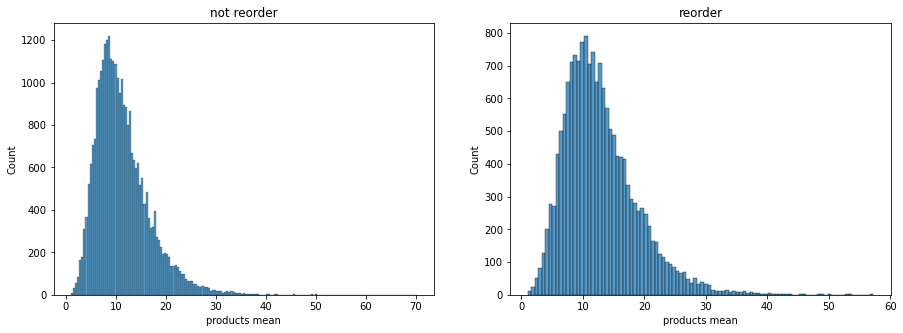

In [ ]:
# matplotlib: https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(no_reorder, ax=ax[0]);
sns.histplot(reorder, ax=ax[1]);

ax[0].set(xlabel='products mean', title='not reorder')
ax[1].set(xlabel='products mean', title = 'reorder')

In [ ]:
df.groupby('reorder_banana')['products_per_order'].agg(['count', 'mean', 'median', 'max', 'min'])

# 바나나 재주문한 고객의 평균 주문제품 수가 일반주문일떄 보다 높구나.>! 
# '주문당 제품 수'도 새로운 특성이 될 수 있겠군.

,count,mean,median,max,min
reorder_banana,,,,,
False,30407,11.309998,10.269231,70.25,1.0
True,16557,12.882434,11.833333,57.25,1.0


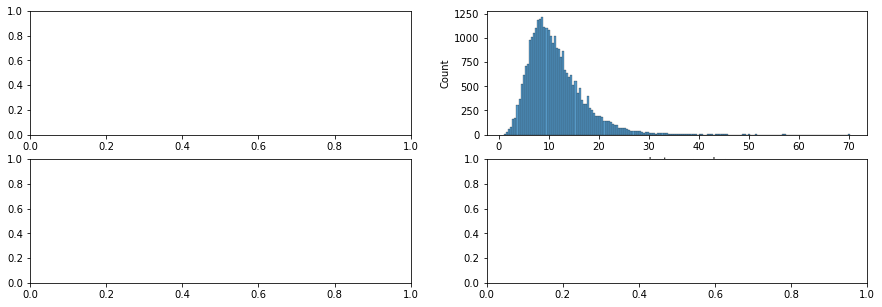

In [ ]:
# matplotlib 연습
fig, axes = plt.subplots(2,2,figsize=(15,5))
sns.histplot(no_reorder, ax=axes[0,1]);

### 2) 고객들이 바나나를 가장 많이 구입하는 시간은?

In [ ]:
prior.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0


In [ ]:
# order_hour_of_day 분포를 살펴보자
hb = prior[prior.product_id==id_Banana]['order_hour_of_day'].value_counts()
hnb = prior[prior.product_id != id_Banana]['order_hour_of_day'].value_counts()

print(hb)
print(hnb[:3])

10    40731
11    38455
14    38218
15    38181
9     37980
13    36992
16    36883
12    36206
17    30701
8     27420
18    24571
19    18801
20    14545
7     14527
21    11698
22     8883
23     5372
6      4778
0      2815
1      1398
5      1315
2       820
4       686
3       589
Name: order_hour_of_day, dtype: int64
10    1387389
11    1353677
14    1329907
Name: order_hour_of_day, dtype: int64


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'without banana')]

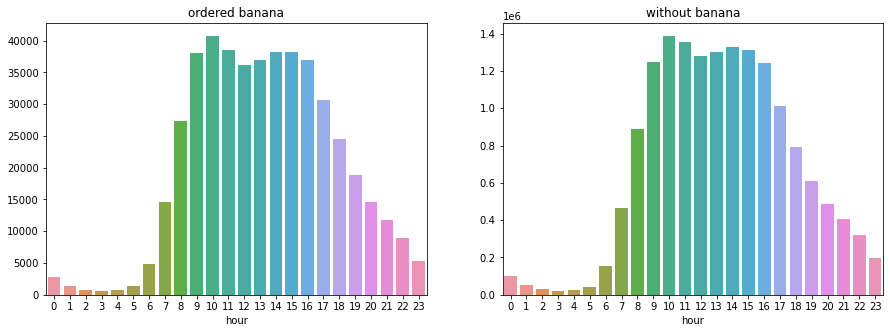

In [ ]:
hb = hb.sort_index()
hnb = hnb.sort_index()

fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.barplot(x=hb.index, y=hb.values, ax=ax[0]);
sns.barplot(x=hnb.index, y=hnb.values, ax=ax[1]);

ax[0].set(xlabel='hour', title='ordered banana')
ax[1].set(xlabel='hour', title='without banana') 

In [ ]:
print(hb.sort_values(ascending=False).index.tolist())
print(hnb.sort_values(ascending=False).index.tolist())

# 바나나 구입 시간의 분포와 순위가 약간 다르긴 한데, 큰 차이는 없음. 좋은 특성이 될지는 의문이군.

[10, 11, 14, 15, 9, 13, 16, 12, 17, 8, 18, 19, 20, 7, 21, 22, 23, 6, 0, 1, 5, 2, 4, 3]
[10, 11, 14, 15, 13, 12, 9, 16, 17, 8, 18, 19, 20, 7, 21, 22, 23, 6, 0, 1, 5, 2, 4, 3]


### 3) 바나나 구매 횟수

In [ ]:
df.head()

,order_id,reorder_banana,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,products_per_order
0,1,False,112108,train,4,4,10,9.0,7.000000
1,36,False,79431,train,23,6,18,30.0,8.500000
2,349,False,156353,train,9,3,16,30.0,19.625000
3,631,False,184099,train,7,3,9,30.0,15.166667
4,878,True,61911,train,9,2,13,30.0,24.500000


In [ ]:
num_ordered_banana = (prior[(prior.user_id.isin(df.user_id)) & (prior.product_id==id_Banana)])
num_ordered_banana 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
802071,10,24852,1,1,Banana,24,4,135442,prior,4,6,8,8.0
802072,20,24852,6,0,Banana,24,4,182912,prior,1,6,17,NaN
802073,22,24852,3,1,Banana,24,4,30822,prior,25,1,8,12.0
802074,26,24852,2,1,Banana,24,4,153404,prior,2,0,16,7.0
802078,72,24852,8,1,Banana,24,4,199522,prior,11,1,19,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274627,3420968,24852,9,1,Banana,24,4,155901,prior,50,0,0,6.0
1274629,3420987,24852,1,1,Banana,24,4,71818,prior,11,3,12,12.0
1274630,3421012,24852,7,1,Banana,24,4,179069,prior,43,4,12,4.0
1274631,3421027,24852,3,1,Banana,24,4,51127,prior,64,2,20,2.0


In [ ]:
num_ordered_banana = (prior[(prior.user_id.isin(df.user_id)) & (prior.product_id==id_Banana)]
                     .groupby('user_id')['product_id']
                     .count()
                     .reset_index()
                     .rename(columns={'product_id':'num_ordered_banana'}))
num_ordered_banana

,user_id,num_ordered_banana
0,2,7
1,10,1
2,21,3
3,27,5
4,37,8
...,...,...
46959,206190,2
46960,206191,5
46961,206195,1
46962,206196,3


In [ ]:
df = df.merge(num_ordered_banana, on='user_id')
df

,order_id,reorder_banana,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,products_per_order,num_ordered_banana
0,1,False,112108,train,4,4,10,9.0,7.000000,1
1,36,False,79431,train,23,6,18,30.0,8.500000,4
2,349,False,156353,train,9,3,16,30.0,19.625000,1
3,631,False,184099,train,7,3,9,30.0,15.166667,1
4,878,True,61911,train,9,2,13,30.0,24.500000,6
...,...,...,...,...,...,...,...,...,...,...
46959,3420812,False,193913,train,15,5,13,6.0,16.000000,13
46960,3420895,False,20949,train,7,1,19,21.0,18.166667,5
46961,3420909,False,8765,train,31,0,19,13.0,9.200000,1
46962,3420996,True,15818,train,16,1,9,7.0,13.733333,14


### 4) 최근 몇일 전에 바나나를 구입했을까?
- prior에서 가장 최근 바나나 구입부터 가장 최근 주문날까지 day_since_prior_order값을 환산

In [ ]:
# order_ids : prior, 바나나 포함된 주문 아이디
order_ids = prior[prior.product_id == id_Banana]['order_id']

In [ ]:
banana_in_order = orders[(orders.eval_set=='prior')&(orders.order_id.isin(order_ids))][['order_id']] 
## reset_index외에 데이터프레임을 만드는 또하나의 방법

banana_in_order['banana_in_order']=True
banana_in_order

,order_id,banana_in_order
14,738281,True
16,1199898,True
17,3194192,True
18,788338,True
19,1718559,True
...,...,...
3420915,1764570,True
3421078,2266710,True
3421079,1854736,True
3421080,626363,True


In [ ]:
orders = orders.merge(banana_in_order, how='left', on='order_id')
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,banana_in_order
0,2168274,2,prior,1,2,11,NaN,NaN
1,1501582,2,prior,2,5,10,10.0,NaN
2,1901567,2,prior,3,1,10,3.0,NaN
3,738281,2,prior,4,2,10,8.0,True
4,1673511,2,prior,5,3,11,8.0,NaN
...,...,...,...,...,...,...,...,...
1512970,2266710,206209,prior,10,5,18,29.0,True
1512971,1854736,206209,prior,11,4,10,30.0,True
1512972,626363,206209,prior,12,1,12,18.0,True
1512973,2977660,206209,prior,13,1,12,7.0,True


In [ ]:
orders['banana_in_order'].value_counts(normalize=True, dropna=False)

#normalize=True : 고유값의 상대빈도가 포함된다.(percent)
#dropna=False : nan수를 포함해서 유일값 세기. default=>True

NaN     0.687658
True    0.312342
Name: banana_in_order, dtype: float64

In [ ]:
last_banana_order_number = (orders[(orders.banana_in_order==True) & (orders.eval_set=='prior')]
                           .groupby(['user_id'])
                           .tail(n=2)[['user_id','order_number']]  
                           .rename(columns={'order_number':'last_banana_order_number'})) 

 # groupby.tail(n=2)각 그룹의 마지막 n개 행을 반환한다.  https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.tail.html
last_banana_order_number

,user_id,last_banana_order_number
54,2,14
55,2,14
60,10,1
88,16,6
89,16,6
...,...,...
5202311,206196,3
5202398,206202,20
5202399,206202,20
5202462,206209,13


In [ ]:
orders = orders.merge(last_banana_order_number, how='left', on='user_id')
orders[orders.user_id==2].head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,banana_in_order,last_banana_order_number_x,last_banana_order_number_y,last_banana_order_number
0,2168274,2,prior,1,2,11,NaN,NaN,10,10,14
1,2168274,2,prior,1,2,11,NaN,NaN,10,10,14
2,2168274,2,prior,1,2,11,NaN,NaN,10,14,14
3,2168274,2,prior,1,2,11,NaN,NaN,10,14,14
4,2168274,2,prior,1,2,11,NaN,NaN,14,10,14


In [ ]:
order_cut = orders[orders.order_number> orders.last_banana_order_number]
order_cut

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,banana_in_order,last_banana_order_number_x,last_banana_order_number_y,last_banana_order_number
112,1492625,2,train,15,1,11,30.0,NaN,10,10,14
113,1492625,2,train,15,1,11,30.0,NaN,10,10,14
114,1492625,2,train,15,1,11,30.0,NaN,10,14,14
115,1492625,2,train,15,1,11,30.0,NaN,10,14,14
116,1492625,2,train,15,1,11,30.0,NaN,14,10,14
...,...,...,...,...,...,...,...,...,...,...,...
10121787,272231,206209,train,14,6,14,30.0,NaN,12,13,13
10121788,272231,206209,train,14,6,14,30.0,NaN,13,12,13
10121789,272231,206209,train,14,6,14,30.0,NaN,13,12,13
10121790,272231,206209,train,14,6,14,30.0,NaN,13,13,13


In [ ]:
days_since_banana_order = (order_cut
                          .groupby('user_id')['days_since_prior_order']
                          .agg('sum')
                          .reset_index()
                          .rename(columns={'days_since_prior_order':'days_since_banana_order'}))
days_since_banana_order

,user_id,days_since_banana_order
0,2,240.0
1,10,109.0
2,16,56.0
3,21,1136.0
4,27,336.0
...,...,...
73951,206194,48.0
73952,206195,93.0
73953,206196,408.0
73954,206202,336.0


In [ ]:
df=df.merge(days_since_banana_order, how='left', on='user_id')
df

,order_id,reorder_banana,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,products_per_order,num_ordered_banana,days_since_banana_order
0,1,False,112108,train,4,4,10,9.0,7.000000,1,24.0
1,36,False,79431,train,23,6,18,30.0,8.500000,4,1352.0
2,349,False,156353,train,9,3,16,30.0,19.625000,1,111.0
3,631,False,184099,train,7,3,9,30.0,15.166667,1,90.0
4,878,True,61911,train,9,2,13,30.0,24.500000,6,240.0
...,...,...,...,...,...,...,...,...,...,...,...
46959,3420812,False,193913,train,15,5,13,6.0,16.000000,13,48.0
46960,3420895,False,20949,train,7,1,19,21.0,18.166667,5,168.0
46961,3420909,False,8765,train,31,0,19,13.0,9.200000,1,226.0
46962,3420996,True,15818,train,16,1,9,7.0,13.733333,14,56.0


지금까지 학습 데이터를 만들기 위해 데이터를 여러가지 방법으로 랭글링 하였습니다. 분명한 것은 원본 데이터로부터 더 좋은 특성을 가진 학습데이터를 만들어 내는 방법은 무수히 많을 수 있다는 것입니다.

이 데이터로 학습이 잘 된다면 행운이겠지만, 그렇지 않을 경우 여러분은 더 좋은 학습 데이터를 만들기 위해 알수없는 기간 고군분투 해야 할 수 있습니다!

그래..!!!! 너무 어려워요 어려워 이 파트때문에 멘탈 무너짐